<h1><center>EXPERIMENT 6</center></h1>

# To implement Autoencoders in MNIST dataset

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [4]:
# Add Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
# Define the autoencoder model
input_img = tf.keras.layers.Input(shape=(28, 28, 1))

In [6]:
# Encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


In [7]:
# Decoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 159s 332ms/step - loss: 0.1685 - val_loss: 0.1199
Epoch 2/10
469/469 [==============================] - 133s 283ms/step - loss: 0.1142 - val_loss: 0.1083
Epoch 3/10
469/469 [==============================] - 85s 182ms/step - loss: 0.1078 - val_loss: 0.1049
Epoch 4/10
469/469 [==============================] - 89s 189ms/step - loss: 0.1049 - val_loss: 0.1026
Epoch 5/10
469/469 [==============================] - 115s 246ms/step - loss: 0.1031 - val_loss: 0.1012
Epoch 6/10
469/469 [==============================] - 171s 365ms/step - loss: 0.1018 - val_loss: 0.1001
Epoch 7/10
469/469 [==============================] - 118s 250ms/step - loss: 0.1008 - val_loss: 0.0998
Epoch 8/10
469/469 [==============================] - 86s 183ms/step - loss: 0.0998 - val_loss: 0.0983
Epoch 9/10
469/469 [==============================] - 85s 180ms/step - loss: 0.0992 - val_loss: 0.0979
Epoch 10/10
469/469 [==============================] - 86s 183ms/ste

In [10]:
# Predict the denoised images
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 3s 8ms/step


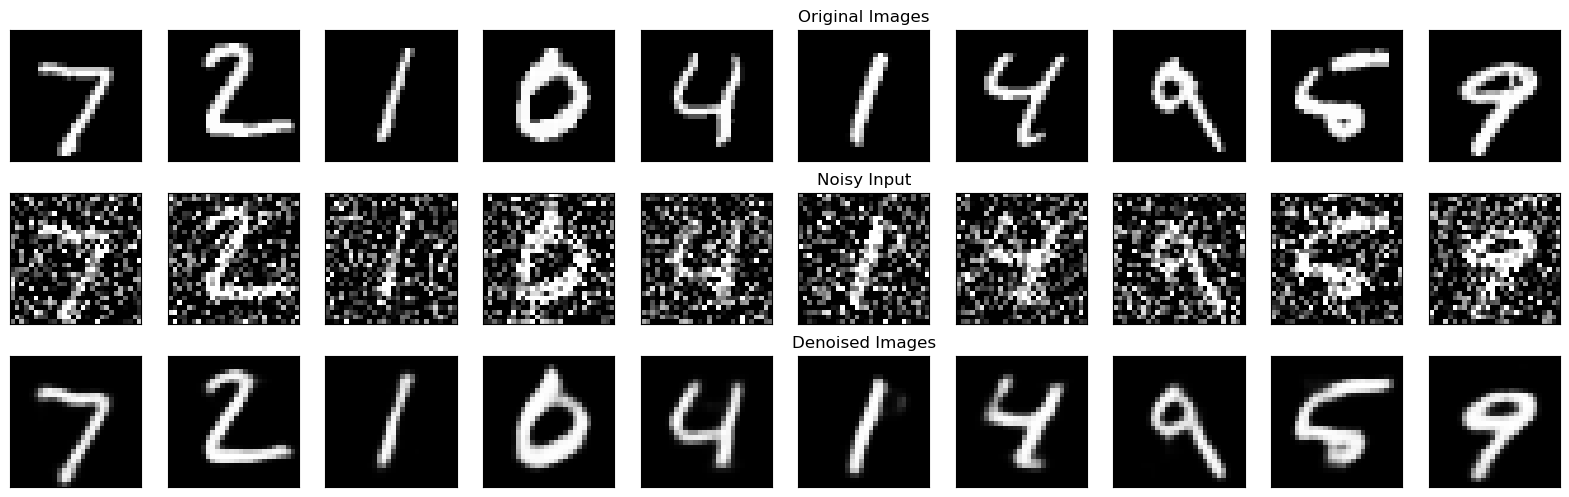

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [11]:
# Plot the original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Input')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Denoised Images')
plt.show()
print(autoencoder.summary())